In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
Z = 16

In [2]:
covid = pd.read_csv("Coronavirus_Italy.csv")
covid.Date = pd.to_datetime(covid.Date)
covid.set_index('Date', inplace=True)
xfin = covid.index[-1]
xquarini = '2020-03-09'
xplus5 = '2020-03-14' #5th day from quarantine

In [3]:
covid.head()

,Infected,Dead,Recovered,Total
Date,,,,
2020-02-24,221,7,1,229
2020-02-25,309,11,1,321
2020-02-26,385,12,3,400
2020-02-27,588,17,45,650
2020-02-28,821,21,45,887


In [4]:
covid.tail()

,Infected,Dead,Recovered,Total
Date,,,,
2020-03-15,20603,1809,2335,24747
2020-03-16,23073,2158,2749,27980
2020-03-17,26062,2503,2941,31506
2020-03-18,28710,2978,4025,35713
2020-03-19,33190,3405,4440,41035


In [5]:
colors = [(1.0, 0.2, 0.2), #Infected
          (0.3, 0.3, 0.3), #Dead
          (0.2, 0.7, 0.2), #Recovered
          (0.0, 0.4, 0.8)] #Total
c_span = (0.9, 0.6, 0.9)
c_5 = (0.8, 0.1, 0.8)
xticks = [t for t in covid.index if ((t.day-29)%5 == 0 and t.month == 2) or ((t.day)%5 == 0 and t.month != 2)]
xticklabels = [t.strftime('%b-%d') for t in xticks]
print(xticklabels)

['Feb-24', 'Feb-29', 'Mar-05', 'Mar-10', 'Mar-15']


In [6]:
covid['Infected_perc'] = covid['Infected'].pct_change()*100
covid['Dead_perc'] = covid['Dead'].pct_change()*100
covid['Recovered_perc'] = covid['Recovered'].pct_change()*100
covid['Total_perc'] = covid['Total'].pct_change()*100

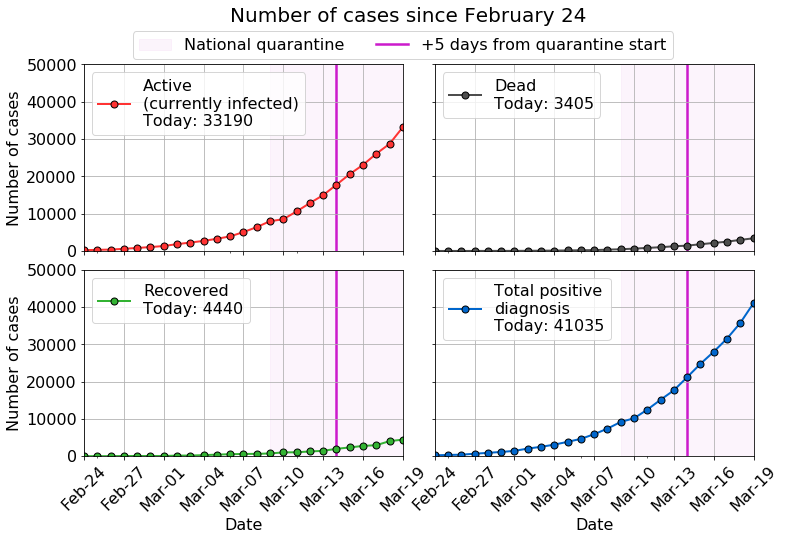

In [12]:
xini = '2020-02-24'
labels = ['Active\n(currently infected)\nToday: {}'.format(covid.Infected[-1]), 
          'Dead\nToday: {}'.format(covid.Dead[-1]),
          'Recovered\nToday: {}'.format(covid.Recovered[-1]),
          'Total positive\ndiagnosis\nToday: {}'.format(covid.Total[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Infected'], ax=axs[0,0], grid=True, color=colors[0], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead'], ax=axs[0,1], grid=True, color=colors[1], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Recovered'], ax=axs[1,0], grid=True, color=colors[2], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Total'], ax=axs[1,1], grid=True, color=colors[3], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Number of cases since February 24', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.set_ylim(-0.5, 50000)
    ax.set_yticks(np.linspace(0, 50000, 6))
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Number of cases", fontsize=Z)
    legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='upper left')
plt.gca().add_artist(legend1)
plt.savefig("Cases.png", dpi=300, format='png')
plt.show()
plt.close()

C:\Users\fsebastian\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


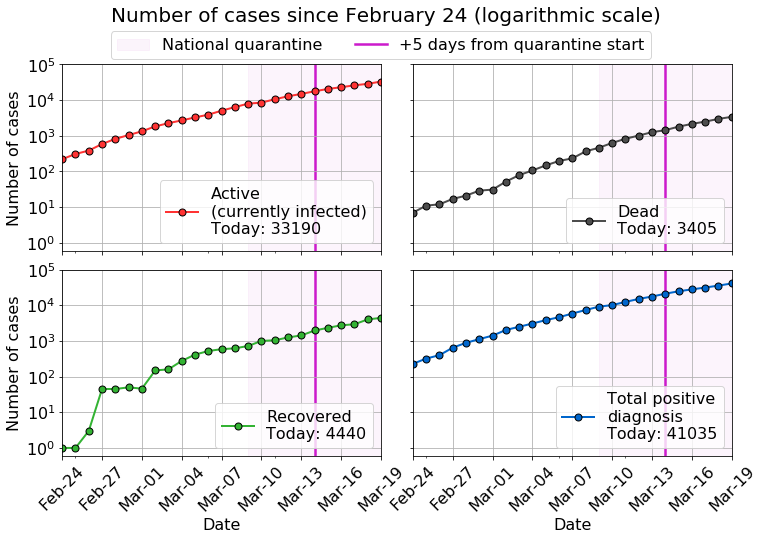

In [8]:
xini = '2020-02-24'
labels = ['Active\n(currently infected)\nToday: {}'.format(covid.Infected[-1]), 
          'Dead\nToday: {}'.format(covid.Dead[-1]),
          'Recovered\nToday: {}'.format(covid.Recovered[-1]),
          'Total positive\ndiagnosis\nToday: {}'.format(covid.Total[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Infected'], ax=axs[0,0], grid=True, color=colors[0], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead'], ax=axs[0,1], grid=True, color=colors[1], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Recovered'], ax=axs[1,0], grid=True, color=colors[2], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Total'], ax=axs[1,1], grid=True, color=colors[3], logy=True, marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Number of cases since February 24 (logarithmic scale)', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.set_ylim(-0.5, 100000)
    ax.set_yticks(np.logspace(0, 5, 6))
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Number of cases", fontsize=Z)
    legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='lower right')
plt.gca().add_artist(legend1)
plt.savefig("Caseslog.png", dpi=300, format='png')
plt.show()
plt.close()

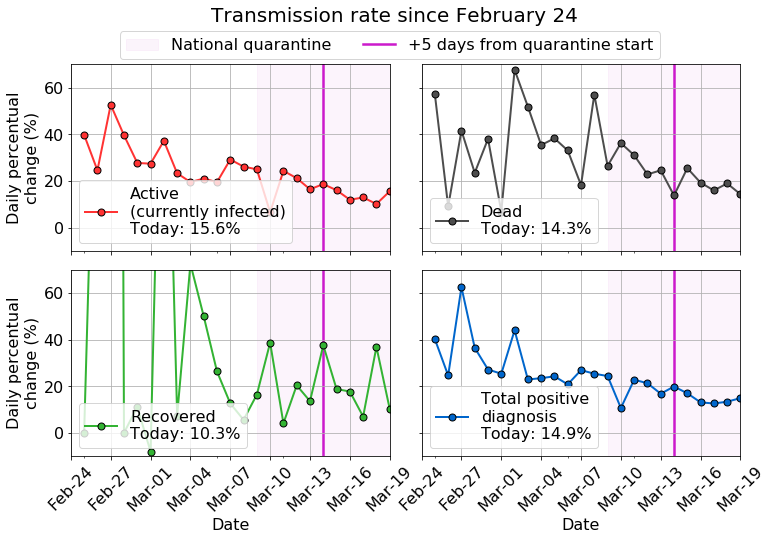

In [9]:
xini = '2020-02-24'
labels = ['Active\n(currently infected)\nToday: {:.1f}%'.format(covid.Infected_perc[-1]), 
          'Dead\nToday: {:.1f}%'.format(covid.Dead_perc[-1]),
          'Recovered\nToday: {:.1f}%'.format(covid.Recovered_perc[-1]),
          'Total positive\ndiagnosis\nToday: {:.1f}%'.format(covid.Total_perc[-1])]
dates = pd.date_range(xini, xfin, freq='3D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Infected_perc'], ax=axs[0,0], grid=True, color=colors[0], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead_perc'], ax=axs[0,1], grid=True, color=colors[1], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Recovered_perc'], ax=axs[1,0], grid=True, color=colors[2], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Total_perc'], ax=axs[1,1], grid=True, color=colors[3], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Transmission rate since February 24', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.set_ylim(-10, 70)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Daily percentual\nchange (%)", fontsize=Z)
    legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='lower left')
plt.gca().add_artist(legend1)
plt.savefig("Transmission.png", dpi=300, format='png')
plt.show()
plt.close()

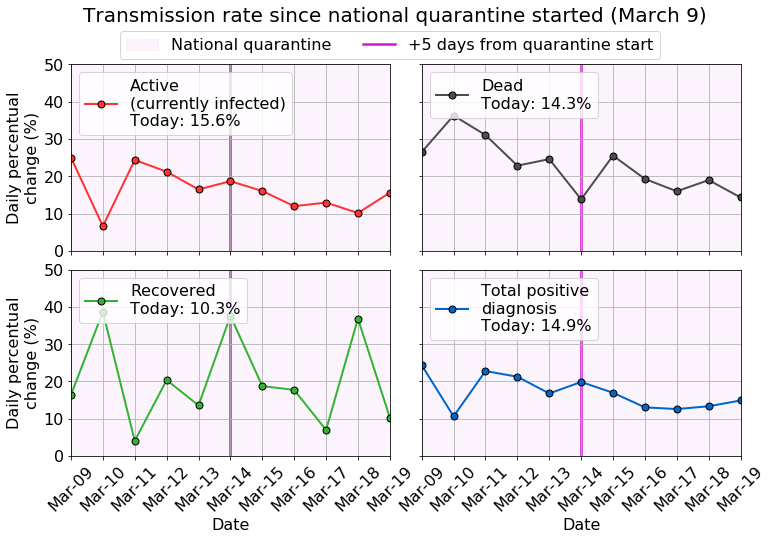

In [10]:
xini = '2020-03-09'
labels = ['Active\n(currently infected)\nToday: {:.1f}%'.format(covid.Infected_perc[-1]), 
          'Dead\nToday: {:.1f}%'.format(covid.Dead_perc[-1]),
          'Recovered\nToday: {:.1f}%'.format(covid.Recovered_perc[-1]),
          'Total positive\ndiagnosis\nToday: {:.1f}%'.format(covid.Total_perc[-1])]
dates = pd.date_range(xini, xfin, freq='D')
dateticks = [t.strftime('%b-%d') for t in dates]

fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=2, sharex=True, sharey=True, gridspec_kw={'hspace': 0.1, 'wspace': 0.1})
covid.plot(y=['Infected_perc'], ax=axs[0,0], grid=True, color=colors[0], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Dead_perc'], ax=axs[0,1], grid=True, color=colors[1], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Recovered_perc'], ax=axs[1,0], grid=True, color=colors[2], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
covid.plot(y=['Total_perc'], ax=axs[1,1], grid=True, color=colors[3], marker='o', markersize=7, linewidth=2, markeredgecolor='k', markeredgewidth=1, xticks=[], x_compat=True)
fig.suptitle('Transmission rate since national quarantine started (March 9)', fontsize=Z+4)
for ax, lab in zip(axs.flatten(), labels):
    quarspan = ax.axvspan(xmin=xquarini, xmax=xfin, color=c_span, alpha=0.1, zorder=0)
    quar = ax.axvline(xplus5, c=c_5, lw=2.5, zorder=1)
    ax.set_xlim(xini, xfin)
    ax.set_xticks(dates)
    ax.set_xticklabels(dateticks, rotation=45)
    ax.set_ylim(0, 50)
    ax.tick_params(labelsize=Z)
    ax.set_xlabel("Date", fontsize=Z)
    ax.set_ylabel("Daily percentual\nchange (%)", fontsize=Z)
    legend1 = plt.legend([quarspan, quar], ['National quarantine', '+5 days from quarantine start'], loc='upper center', bbox_to_anchor=(-0.1,2.32), fontsize=Z, ncol=2)
    ax.legend([lab], fontsize=Z, loc='upper left')
plt.gca().add_artist(legend1)
plt.savefig("TransmissionQuar.png", dpi=300, format='png')
plt.show()
plt.close()